## Predicting Weight From Food Choices

Given *data about different people's food preferences*, let's try to predict the **weight** of a given person.

We will use TensorFlow ANN to make our predictions.

Data source: https://www.kaggle.com/datasets/borapajo/food-choices

### Importing Libraries

In [8]:
import numpy as np
import pandas as pd
import plotly.express as px
pd.set_option('display.max_columns', None)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import r2_score

In [9]:
data = pd.read_csv('archive/food_coded.csv')
data

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,2.0,9,NaN,eat good and exercise,1,1.0,eat faster,1,1,3,3.0,1,1.0,5.0,profesor,Arabic cuisine,3,1.0,rice and chicken,2,5,2,5,2,looks not oily,being healthy,8,5.0,5,5,1.0,1.0,"rice, chicken, soup",1.0,unemployed,5,1.0,1,2,5.0,3.0,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,3.0,1,1.0,I eat about three times a day with some snacks...,2,2.0,I eat out more than usual.,1,2,2,2.0,4,1.0,2.0,Self employed,Italian,1,1.0,"chicken and biscuits, beef soup, baked beans",1,4,4,4,5,"Grains, Veggies, (more of grains and veggies),...",Try to eat 5-6 small meals a day. While trying...,3,4.0,4,4,1.0,2.0,"Pasta, steak, chicken",4.0,Nurse RN,4,1.0,1,4,4.0,3.0,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,1.0,1,3.0,"toast and fruit for breakfast, salad for lunch...",3,1.0,sometimes choosing to eat fast food instead of...,1,3,2,3.0,5,2.0,2.0,owns business,italian,1,3.0,"mac and cheese, pizza, tacos",1,5,3,5,6,usually includes natural ingredients; nonproce...,i would say my ideal diet is my current diet,6,6.0,5,5,7.0,2.0,"chicken and rice with veggies, pasta, some kin...",2.0,owns business,4,2.0,1,3,5.0,6.0,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,2.0,2,2.0,"College diet, cheap and easy foods most nights...",2,2.0,Accepting cheap and premade/store bought foods,1,3,2,3.0,5,3.0,2.0,Mechanic,Turkish,3,1.0,"Beef stroganoff, tacos, pizza",2,4,4,5,7,"Fresh fruits& vegetables, organic meats","Healthy, fresh veggies/fruits & organic foods",2,6.0,5,5,2.0,2.0,Grilled chicken \rStuffed Shells\rHomemade Chili,4.0,Special Education Teacher,2,1.0,1,2,5.0,5.0,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,1.0,1,2.0,I try to eat healthy but often struggle becaus...,2,2.0,I have eaten generally the same foods but I do...,3,4,2,2.0,4,1.0,4.0,IT,Italian,1,3.0,"Pasta, chicken tender, pizza",1,4,4,4,6,"A lean protein such as grilled chicken, green ...",Ideally I would like to be able to eat healthi...,2,6.0,2,5,1.0,1.0,"Chicken Parmesan, Pulled Pork, Spaghetti and m...",5.0,Substance Abuse Conselor,3,1.0,1,4,2.0,4.0,1.0,1.0,4,940.0,500,Softball,4,2,760,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3.5,1,1,610,4.0,420.0,2,"wine. mac and cheese, pizza, ice cream",boredom and sadness,NaN,3.0,2,1.0,"My diet consists mainly of coffee, water, frui...",2,2.0,I have noticed there is less time for a prepar...,1,3,2,1.0,4,2.0,4.0,Accountant,Italian,1,1.0,Stromboli Mac and Cheese and Pizza,1,5,4,5,5,mainly protein and vegetables with a complex c...,My ideal diet would consist of a majority of w...,6,4.0,3,5,7.0,1.0,"pasta, fish, steak",3.0,Radiological Technician,5,3.0,1,4,3.0

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          123 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

### Preprocessing

In [11]:
df = data.copy()

In [20]:
df[(df.isna().sum()[df.isna().sum() >= 10]).index]

,calories_day,comfort_food_reasons_coded,cuisine,exercise,type_sports
0,NaN,9.0,NaN,1.0,car racing
1,3.0,1.0,1.0,1.0,Basketball
2,4.0,1.0,3.0,2.0,none
3,3.0,2.0,2.0,3.0,NaN
4,2.0,1.0,2.0,1.0,Softball
...,...,...,...,...,...
120,4.0,NaN,1.0,2.0,Softball
121,2.0,NaN,NaN,2.0,basketball
122,NaN,NaN,NaN,2.0,none
123,4.0,NaN,1.0,1.0,NaN


In [22]:
{column: len(df[column].unique()) for column in df[(df.isna().sum()[df.isna().sum() >= 10]).index]}

{'calories_day': 4,
 'comfort_food_reasons_coded': 10,
 'cuisine': 7,
 'exercise': 4,
 'type_sports': 67}

In [23]:
df = df.drop('type_sports', axis=1)

In [25]:
numeric_nulls = [column for column in df.columns if df.dtypes[column] != 'object' and df.isna().sum()[column] != 0]
numeric_nulls

['calories_day',
 'calories_scone',
 'comfort_food_reasons_coded',
 'cook',
 'cuisine',
 'drink',
 'employment',
 'exercise',
 'father_education',
 'fav_food',
 'income',
 'life_rewarding',
 'marital_status',
 'mother_education',
 'on_off_campus',
 'persian_food',
 'self_perception_weight',
 'soup',
 'sports',
 'tortilla_calories']

In [26]:
for column in numeric_nulls:
    df[column] = df[column].fillna(df[column].mean())

In [28]:
df.isna().sum()[df.isna().sum() > 0]

GPA                     2
comfort_food            1
comfort_food_reasons    2
diet_current            1
eating_changes          3
father_profession       3
fav_cuisine             2
food_childhood          1
healthy_meal            1
ideal_diet              1
meals_dinner_friend     3
mother_profession       2
weight                  2
dtype: int64

In [32]:
{column: df[column].unique() for column in df.columns if df.isna().sum()[column] > 0}

{'GPA': array(['2.4', '3.654', '3.3', '3.2', '3.5', '2.25', '3.8', '3.904', '3.4',
        '3.6', '3.1', nan, '4', '2.2', '3.87', '3.7', '3.9', '2.8', '3',
        '3.65', '3.89', '2.9', '3.605', '3.83', '3.292', '3.35',
        'Personal ', '2.6', '3.67', '3.73', '3.79 bitch', '2.71', '3.68',
        '3.75', '3.92', 'Unknown', '3.77', '3.63', '3.882'], dtype=object),
 'comfort_food': array(['none', 'chocolate, chips, ice cream',
        'frozen yogurt, pizza, fast food',
        'Pizza, Mac and cheese, ice cream', 'Ice cream, chocolate, chips ',
        'Candy, brownies and soda.',
        'Chocolate, ice cream, french fries, pretzels',
        'Ice cream, cheeseburgers, chips.', 'Donuts, ice cream, chips',
        'Mac and cheese, chocolate, and pasta ',
        'Pasta, grandma homemade chocolate cake anything homemade ',
        'chocolate, pasta, soup, chips, popcorn',
        'Cookies, popcorn, and chips', 'ice cream, cake, chocolate',
        'Pizza, fruit, spaghetti, chicken and

In [35]:
df['GPA'] = df['GPA'].replace('Personal ', np.nan)
df['GPA'] = df['GPA'].replace('Unknown', np.nan)
df['GPA'] = df['GPA'].replace('3.79 bitch', '3.79')

In [37]:
df['GPA'] = df['GPA'].astype(float)

In [39]:
df['GPA'] = df['GPA'].fillna(df['GPA'].mean())

In [40]:
{column: df[column].unique() for column in df.columns if df.isna().sum()[column] > 0}

{'comfort_food': array(['none', 'chocolate, chips, ice cream',
        'frozen yogurt, pizza, fast food',
        'Pizza, Mac and cheese, ice cream', 'Ice cream, chocolate, chips ',
        'Candy, brownies and soda.',
        'Chocolate, ice cream, french fries, pretzels',
        'Ice cream, cheeseburgers, chips.', 'Donuts, ice cream, chips',
        'Mac and cheese, chocolate, and pasta ',
        'Pasta, grandma homemade chocolate cake anything homemade ',
        'chocolate, pasta, soup, chips, popcorn',
        'Cookies, popcorn, and chips', 'ice cream, cake, chocolate',
        'Pizza, fruit, spaghetti, chicken and Potatoes  ',
        'cookies, donuts, candy bars', 'Saltfish, Candy and Kit Kat ',
        'chips, cookies, ice cream', 'Chocolate, ice crea ',
        'pizza, wings, Chinese', 'Fast food, pizza, subs',
        'chocolate, sweets, ice cream', 'burgers, chips, cookies',
        'Chilli, soup, pot pie', 'Soup, pasta, brownies, cake',
        'chocolate, ice cream/milks

In [44]:
non_numeric_nulls = [column for column in df.columns if df.dtypes[column] == 'object' and df.isna().sum()[column] != 0]
non_numeric_nulls.remove('weight')
non_numeric_nulls

['comfort_food',
 'comfort_food_reasons',
 'diet_current',
 'eating_changes',
 'father_profession',
 'fav_cuisine',
 'food_childhood',
 'healthy_meal',
 'ideal_diet',
 'meals_dinner_friend',
 'mother_profession']

In [45]:
df = df.drop(non_numeric_nulls, axis=1)

In [46]:
df

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,diet_current_coded,drink,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,exercise,father_education,fav_cuisine_coded,fav_food,fries,fruit_day,grade_level,greek_food,healthy_feeling,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,mother_education,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories,weight
0,2.400,2,1,430,3.028302,315.0,1,9.000000,2.000000,9,1.388889,1,1.0,1,1,3,3.0,1,1.0,5.0,3,1.0,2,5,2,5,2,8,5.0,5,5,1.0,1.0,1.0,5,1.0,1,2,5.0,3.0,1.0,1.000000,1,1165.0,345,5,1,1315,187
1,3.654,1,1,610,3.000000,420.0,2,1.000000,3.000000,1,1.000000,2,2.0,1,2,2,2.0,4,1.0,2.0,1,1.0,1,4,4,4,5,3,4.0,4,4,1.0,2.0,4.0,4,1.0,1,4,4.0,3.0,1.0,1.000000,2,725.0,690,4,2,900,155
2,3.300,1,1,720,4.000000,420.0,2,1.000000,1.000000,1,3.000000,3,1.0,1,3,2,3.0,5,2.0,2.0,1,3.0,1,5,3,5,6,6,6.0,5,5,7.0,2.0,2.0,4,2.0,1,3,5.0,6.0,1.0,2.000000,5,1165.0,500,5,1,900,I'm not answering this.
3,3.200,1,1,430,3.000000,420.0,2,2.000000,2.000000,2,2.000000,2,2.0,1,3,2,3.0,5,3.0,2.0,3,1.0,2,4,4,5,7,2,6.0,5,5,2.0,2.0,4.0,2,1.0,1,2,5.0,5.0,1.0,2.000000,5,725.0,690,3,1,1315,"Not sure, 240"
4,3.500,1,1,720,2.000000,420.0,2,1.000000,1.000000,1,2.000000,2,2.0,3,4,2,2.0,4,1.0,4.0,1,3.0,1,4,4,4,6,2,6.0,2,5,1.0,1.0,5.0,3,1.0,1,4,2.0,4.0,1.0,1.000000,4,940.0,500,4,2,760,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3.500,1,1,610,4.000000,420.0,2,2.698113,3.000000,2,1.000000,2,2.0,1,3,2,1.0,4,2.0,4.0,1,1.0,1,5,4,5,5,6,4.0,3,5,7.0,1.0,3.0,5,3.0,1,4,3.0,4.0,1.0,1.000000,5,940.0,500,5,1,1315,156
121,3.000,1,1,265,2.000000,315.0,2,2.698113,3.000000,3,1.388889,2,1.0,1,3,4,3.0,3,2.0,5.0,2,1.0,1,4,4,1,5,5,2.0,5,5,7.0,1.0,2.0,3,1.0,3,4,1.0,4.0,1.0,1.390244,4,940.0,500,5,2,1315,180
122,3.882,1,1,720,3.028302,420.0,1,2.698113,3.000000,3,1.388889,2,1.0,1,3,3,3.0,5,2.0,5.0,4,1.0,1,4,3,5,6,2,2.0,5,3,10.0,1.0,1.0,3,1.0,2,4,5.0,4.0,1.0,2.000000,5,580.0,690,4,2,1315,120
123,3.000,2,1,720,4.000000,420.0,1,2.698113,3.000000,7,1.000000,1,2.0,1,8,5,2.0,2,1.0,3.0,1,3.0,1,5,1,1,1,6,4.0,1,5,1.0,1.0,2.0,4,1.0,2,3,1.0,2.0,2.0,2.000000,1,940.0,500,3,1,1315,135


In [47]:
df['weight'].unique()

array(['187', '155', "I'm not answering this. ", 'Not sure, 240', '190',
       '180', '137', '125', '116', '110', '264', '123', '185', '145',
       '170', '135', '165', '175', '195', '105', '160', '167', '115',
       '205', nan, '128', '150', '140', '120', '100', '113', '168', '169',
       '200', '265', '192', '118', '210', '112', '144 lbs', '130', '127',
       '129', '260', '184', '230', '138', '156'], dtype=object)

In [48]:
df['weight'] = df['weight'].replace('Not sure, 240', '240')
df['weight'] = df['weight'].replace('144 lbs', '144')
df['weight'] = df['weight'].replace("I'm not answering this. ", np.nan)

df = df.dropna(axis=0).reset_index(drop=True)

In [49]:
df.isna().sum().sum()

np.int64(0)

In [50]:
df['weight'] = df['weight'].astype(float)

In [51]:
df

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,diet_current_coded,drink,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,exercise,father_education,fav_cuisine_coded,fav_food,fries,fruit_day,grade_level,greek_food,healthy_feeling,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,mother_education,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories,weight
0,2.400,2,1,430,3.028302,315.0,1,9.000000,2.000000,9,1.388889,1,1.0,1,1,3,3.0,1,1.0,5.0,3,1.0,2,5,2,5,2,8,5.0,5,5,1.0,1.0,1.0,5,1.0,1,2,5.0,3.0,1.0,1.000000,1,1165.0,345,5,1,1315,187.0
1,3.654,1,1,610,3.000000,420.0,2,1.000000,3.000000,1,1.000000,2,2.0,1,2,2,2.0,4,1.0,2.0,1,1.0,1,4,4,4,5,3,4.0,4,4,1.0,2.0,4.0,4,1.0,1,4,4.0,3.0,1.0,1.000000,2,725.0,690,4,2,900,155.0
2,3.200,1,1,430,3.000000,420.0,2,2.000000,2.000000,2,2.000000,2,2.0,1,3,2,3.0,5,3.0,2.0,3,1.0,2,4,4,5,7,2,6.0,5,5,2.0,2.0,4.0,2,1.0,1,2,5.0,5.0,1.0,2.000000,5,725.0,690,3,1,1315,240.0
3,3.500,1,1,720,2.000000,420.0,2,1.000000,1.000000,1,2.000000,2,2.0,3,4,2,2.0,4,1.0,4.0,1,3.0,1,4,4,4,6,2,6.0,2,5,1.0,1.0,5.0,3,1.0,1,4,2.0,4.0,1.0,1.000000,4,940.0,500,4,2,760,190.0
4,2.250,1,1,610,3.000000,980.0,2,4.000000,3.000000,4,1.388889,2,2.0,1,3,1,3.0,4,2.0,1.0,6,3.0,1,2,2,2,4,2,1.0,5,5,4.0,2.0,1.0,1,1.0,2,5,5.0,5.0,1.0,2.000000,4,940.0,345,1,2,1315,190.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3.500,1,1,610,4.000000,420.0,2,2.698113,3.000000,2,1.000000,2,2.0,1,3,2,1.0,4,2.0,4.0,1,1.0,1,5,4,5,5,6,4.0,3,5,7.0,1.0,3.0,5,3.0,1,4,3.0,4.0,1.0,1.000000,5,940.0,500,5,1,1315,156.0
118,3.000,1,1,265,2.000000,315.0,2,2.698113,3.000000,3,1.388889,2,1.0,1,3,4,3.0,3,2.0,5.0,2,1.0,1,4,4,1,5,5,2.0,5,5,7.0,1.0,2.0,3,1.0,3,4,1.0,4.0,1.0,1.390244,4,940.0,500,5,2,1315,180.0
119,3.882,1,1,720,3.028302,420.0,1,2.698113,3.000000,3,1.388889,2,1.0,1,3,3,3.0,5,2.0,5.0,4,1.0,1,4,3,5,6,2,2.0,5,3,10.0,1.0,1.0,3,1.0,2,4,5.0,4.0,1.0,2.000000,5,580.0,690,4,2,1315,120.0
120,3.000,2,1,720,4.000000,420.0,1,2.698113,3.000000,7,1.000000,1,2.0,1,8,5,2.0,2,1.0,3.0,1,3.0,1,5,1,1,1,6,4.0,1,5,1.0,1.0,2.0,4,1.0,2,3,1.0,2.0,2.0,2.000000,1,940.0,500,3,1,1315,135.0


In [52]:
y = df.loc[:, 'weight']
X = df.drop('weight', axis=1)

In [53]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X))

In [54]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
0,-2.690332,1.263228,-0.345349,-1.154820,-0.001202,-0.836840,-1.75119,3.677608,-0.790659,3.477618,0.039830,-0.991278,-1.133763,-0.711712,-1.399082,0.374732,1.089869,-2.325489,-0.921434,1.273931,0.277910,-0.778803,3.176619,0.839263,-0.311848,1.125261,-1.323137,2.152106,0.325086,1.268450,0.460348,-1.304941,-0.963788,-2.166319,1.536455,-0.463366,-0.698972,-1.344136,1.592301,-0.083903,-0.538045,-0.795207,-1.614198,1.085672,-1.415757,0.931257,-1.033342,0.952048
1,0.599176,-0.791623,-0.345349,0.245503,-0.050075,-0.382032,0.57104,-0.955384,0.210376,-0.896293,-0.407738,0.367553,0.896700,-0.711712,-1.008492,-0.504446,-0.866476,0.230454,-0.921434,-1.280686,-0.749515,-0.778803,-0.314800,-0.238527,1.457709,0.391134,-0.167366,-0.306292,-0.365049,0.592682,-1.294730,-1.304941,1.046163,0.491842,0.707041,-0.463366,-0.698972,0.585095,0.878615,-0.083903,-0.538045,-0.795207,-0.915857,-1.155184,0.867354,0.007571,0.967733,-0.728935
2,-0.591762,-0.791623,-0.345349,-1.154820,-0.050075,-0.382032,0.57104,-0.376260,-0.790659,-0.349554,0.743152,0.367553,0.896700,-0.711712,-0.617901,-0.504446,1.089869,1.082435,2.242003,-1.280686,0.277910,-0.778803,3.176619,-0.238527,1.457709,1.125261,0.603148,-0.797972,1.015220,1.268450,0.460348,-0.980768,1.046163,0.491842,-0.951787,-0.463366,-0.698972,-1.344136,1.592301,1.756984,-0.538045,1.278632,1.179166,-1.155184,0.867354,-0.916115,-1.033342,0.952048
3,0.195201,-0.791623,-0.345349,1.101256,-1.776911,-0.382032,0.57104,-0.955384,-1.791693,-0.896293,0.743152,0.367553,0.896700,1.959945,-0.227311,-0.504446,-0.866476,0.230454,-0.921434,0.422392,-0.749515,1.438160,-0.314800,-0.238527,1.457709,0.391134,0.217891,-0.797972,1.015220,-0.758854,0.460348,-1.304941,-0.963788,1.377895,-0.122373,-0.463366,-0.698972,0.585095,-0.548757,0.836540,-0.538045,-0.795207,0.480825,-0.060220,-0.390011,0.007571,0.967733,-1.296014
4,-3.083813,-0.791623,-0.345349,0.245503,-0.050075,2.043606,0.57104,0.781988,0.210376,0.743924,0.039830,0.367553,0.896700,-0.711712,-0.617901,-1.383624,1.089869,0.230454,0.660284,-2.132225,1.819048,1.438160,-0.314800,-2.394109,-0.311848,-1.077122,-0.552623,-0.797972,-2.435452,1.268450,0.460348,-0.332423,1.046163,-2.166319,-1.781200,-0.463366,0.676424,1.549710,1.592301,1.756984,-0.538045,1.278632,0.480825,-0.060220,-1.415757,-2.763487,0.967733,0.952048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,0.195201,-0.791623,-0.345349,0.245503,1.676762,-0.382032,0.57104,0.028034,0.210376,-0.349554,-0.407738,0.367553,0.896700,-0.711712,-0.617901,-0.504446,-2.822821,0.230454,0.660284,0.422392,-0.749515,-0.778803,-0.314800,0.839263,1.457709,1.125261,-0.167366,1.168747,-0.365049,-0.083086,0.460348,0.640096,-0.963788,-0.394212,1.536455,2.486888,-0.698972,0.585095,0.164929,0.836540,-0.538045,-0.795207,1.179166,-0.060220,-0.390011,0.931257,-1.033342,0.952048
118,-1.116405,-0.791623,-0.345349,-2.438450,-1.776911,-0.836840,0.57104,0.028034,0.210376,0.197185,0.039830,0.367553,-1.133763,-0.711712,-0.617901,1.253910,1.089869,-0.621527,0.660284,1.273931,-0.235803,-0.778803,-0.314800,-0.238527,1.457709,-1.811249,-0.167366,0.677067,-1.745318,1.268450,0.460348,0.640096,-0.963788,-1.280265,-0.122373,-0.463366,2.051820,0.585095,-1.262443,0.836540,-0.538045,0.014096,0.480825,-0.060220,-0.390011,0.931257,0.967733,0.952048
119,1.197268,-0.791623,-0.345349,1.101256,-0.001202,-0.382032,-1.75119,0.028034,0.210376,0.197185,0.039830,0.367553,-1.133763,-0.711712,-0.617901,0.374732,1.089869,1.082435,0.660284,1.273931,0.791623,-0.778803,-0.314800,-0.238527,0.572930,1.125261,0.217891,-0.797972,-1.745318,1.268450,-3.049807,1.612614,-0.963788,-2.166319,-0.122373,-0.463366,0.676424,0.585095,1.592301,0.836540,-0.538045,1.278632,1.179166,-1.893648,0.867354,0.007571,0.967733,0.95204

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=22)

### Training

In [56]:
X.shape

(122, 48)

In [57]:
inputs = tf.keras.Input(shape=(48, ))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='linear')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer = 'adam',
    loss = 'mse'
)

batch_size = 32
epochs = 200

history = model.fit(
    X_train, 
    y_train,
    validation_split = 0.2,
    batch_size = batch_size,
    epochs = epochs
)

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - loss: 24652.5254 - val_loss: 24885.3613
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 24517.3848 - val_loss: 24755.1719
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 24386.8105 - val_loss: 24626.3379
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 24257.7891 - val_loss: 24495.3418
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 24122.1406 - val_loss: 24356.7812
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 23980.1406 - val_loss: 24212.7051
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 23833.0117 - val_loss: 24057.6113
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 23671.9941 - val_loss: 23892.6777
Epoch 9/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 23501.3066 - val_loss: 23715.8438
Epoch 10/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 23317.2402 - val_loss: 23530.4434
Epoch 11/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 23117.9102 - val_lo

### Results

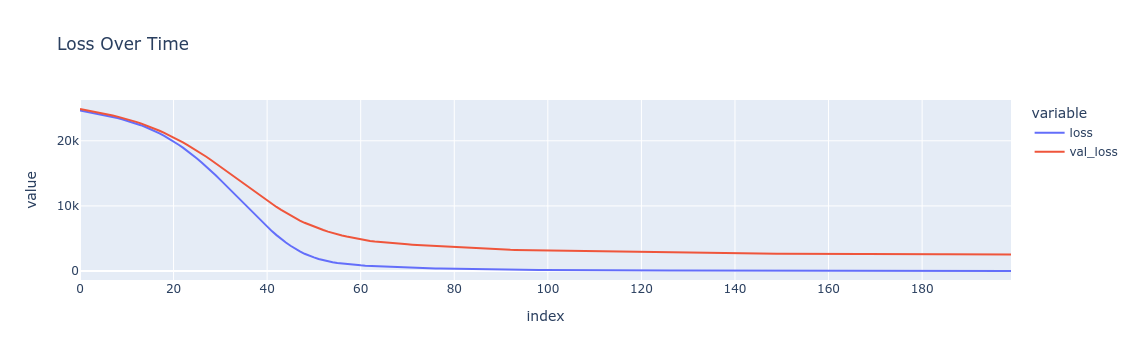

In [58]:
fig = px.line(
    history.history,
    y = ['loss', 'val_loss'],
    labels = {'x': 'Epoch', 'y': 'Loss'},
    title = 'Loss Over Time'
)

fig.show()

In [59]:
y_preds = np.squeeze(model.predict(X_test))
y_preds

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


array([121.07401 , 165.15968 , 123.702866, 102.03267 ,  90.50565 ,
        91.5121  , 179.0252  , 103.01677 , 152.03104 , 132.36356 ,
        95.092834, 163.16125 , 166.01523 , 155.55704 ,  90.83476 ,
       136.41058 ,  93.68276 , 148.94643 , 108.345245, 145.54242 ,
       104.65063 ,  60.12337 ,  96.97058 ,  98.84915 , 119.95109 ,
        90.262276, 108.34416 , 112.13866 , 129.7533  , 154.42413 ,
       132.35236 ,  78.144   , 166.23445 , 105.00186 , 112.25029 ,
       120.409225, 148.22531 ], dtype=float32)

In [61]:
print("R^2 Score:", r2_score(y_test, y_preds))

R^2 Score: -1.671517622205025
